In [27]:
# Import des librairies
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Connexion à la base MySQL
def get_engine():
    return create_engine("mysql+pymysql://root:@127.0.0.1/TP_Interface_Data", echo=False)

# Chargement des deux tables base1 et base2
def charger_bases():
    engine = get_engine()
    df1 = pd.read_sql("SELECT * FROM base1", engine)
    df2 = pd.read_sql("SELECT * FROM base2", engine)
    return df1, df2

In [ ]:
# Nettoyage des colonnes textuelles (supprime espaces et valeurs vides)
def nettoyer_textes(df):
    for c in df.select_dtypes(include='object').columns:
        df[c] = df[c].astype(str).str.strip()
        # remplacer string "nan" ou "" par NaN réel
        df[c] = df[c].replace({"": np.nan, "nan": np.nan})
    return df

In [30]:
# Imputation 
# Remplace les valeurs manquantes
def imputer(df):
    for c in df.columns:
        if pd.api.types.is_numeric_dtype(df[c]):
            df[c] = df[c].fillna(df[c].mean())
        else:
            df[c] = df[c].fillna("Inconnu")
    return df

In [31]:
# Aperçu des données avant et après le nettoyage

df1, df2 = charger_bases()
print("=== APERÇU AVANT/APRÈS NETTOYAGE ===")
print("\n--- BASE1 AVANT ---")
print(df1.head())
print("\n--- BASE2 AVANT ---")
print(df2.head())

=== APERÇU AVANT/APRÈS NETTOYAGE ===

--- BASE1 AVANT ---
   id       nom   age  salaire date_embauche
0   1    Ahmed   30.0   3500.0    2020-01-10
1   2    sara    28.0      NaN    2019-05-15
2   3     KARIM  35.0   4000.0    2018-09-20
3   4            32.0   3800.0    2021-03-25
4   5   mohamed   NaN   4200.0    2017-11-30

--- BASE2 AVANT ---
   id      nom        poste     departement  salaire
0   1    Ahmed  ingénieur      Informatique   3550.0
1   2     Sara     analyste         Finance      NaN
2   3    karim         None       Marketing   4200.0
3   4     Lina      Manager            RH     4500.0
4   5  mohamed          dev            None   3700.0


In [32]:
df1_clean = nettoyer_textes(imputer(df1))
df2_clean = nettoyer_textes(imputer(df2))
print("\n--- BASE1 APRÈS ---")
print(df1_clean.head())
print("\n--- BASE2 APRÈS ---")
print(df2_clean.head())


--- BASE1 APRÈS ---
   id      nom        age      salaire date_embauche
0   1    Ahmed  30.000000  3500.000000    2020-01-10
1   2     sara  28.000000  3733.333333    2019-05-15
2   3    KARIM  35.000000  4000.000000    2018-09-20
3   4      NaN  32.000000  3800.000000    2021-03-25
4   5  mohamed  30.166667  4200.000000    2017-11-30

--- BASE2 APRÈS ---
   id      nom      poste   departement      salaire
0   1    Ahmed  ingénieur  Informatique  3550.000000
1   2     Sara   analyste       Finance  3991.666667
2   3    karim    Inconnu     Marketing  4200.000000
3   4     Lina    Manager            RH  4500.000000
4   5  mohamed        dev       Inconnu  3700.000000


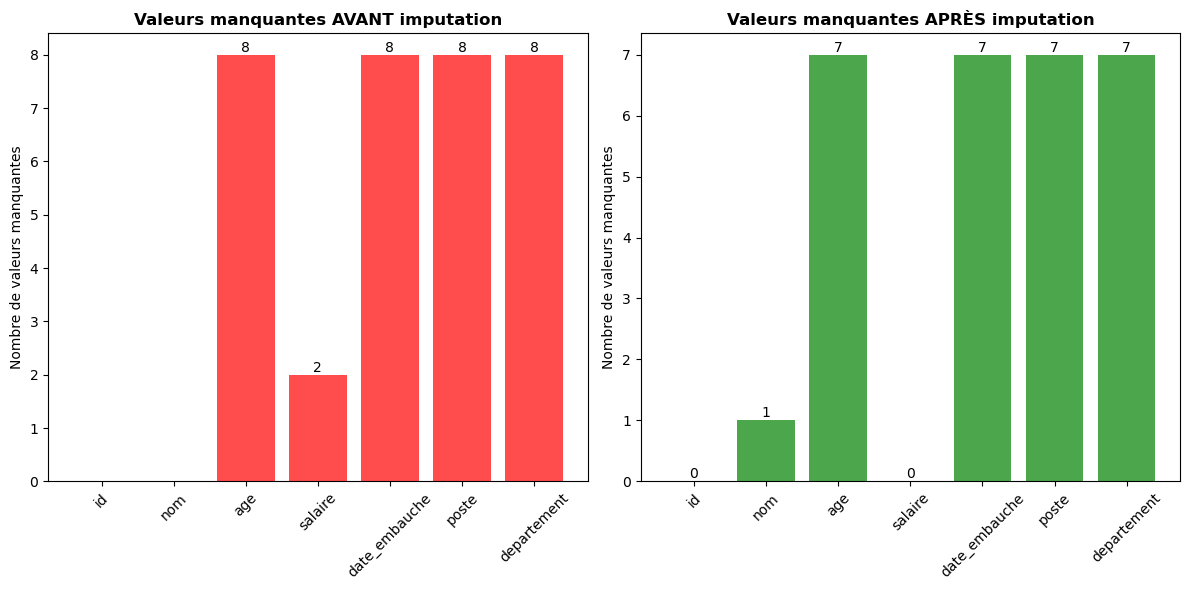

In [33]:
# Distribution des valeurs manquantes avant imputation
df1, df2 = charger_bases()
    
# Combiner les deux bases pour l'analyse
df_combined = pd.concat([df1, df2])
    
plt.figure(figsize=(12, 6))
    
# Données avant nettoyage
missing_before = df_combined.isnull().sum()
    
plt.subplot(1, 2, 1)
bars = plt.bar(missing_before.index, missing_before.values, color='red', alpha=0.7)
plt.title("Valeurs manquantes AVANT imputation", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("Nombre de valeurs manquantes")
    
# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}', ha='center', va='bottom')
    
# Données après nettoyage
df1_clean = nettoyer_textes(imputer(df1))
df2_clean = nettoyer_textes(imputer(df2))
df_combined_clean = pd.concat([df1_clean, df2_clean])
missing_after = df_combined_clean.isnull().sum()
    
plt.subplot(1, 2, 2)
bars = plt.bar(missing_after.index, missing_after.values, color='green', alpha=0.7)
plt.title("Valeurs manquantes APRÈS imputation", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("Nombre de valeurs manquantes")
    
# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

In [34]:
# Normalisation 
# Normalise les valeurs numériques entre 0 et 1
def normaliser(df):
    num_cols = df.select_dtypes(include='number').columns
    num_cols = [col for col in num_cols if 'id' not in col.lower()]
    if len(num_cols) > 0:
        scaler = MinMaxScaler()
        df[num_cols] = scaler.fit_transform(df[num_cols])
    return df

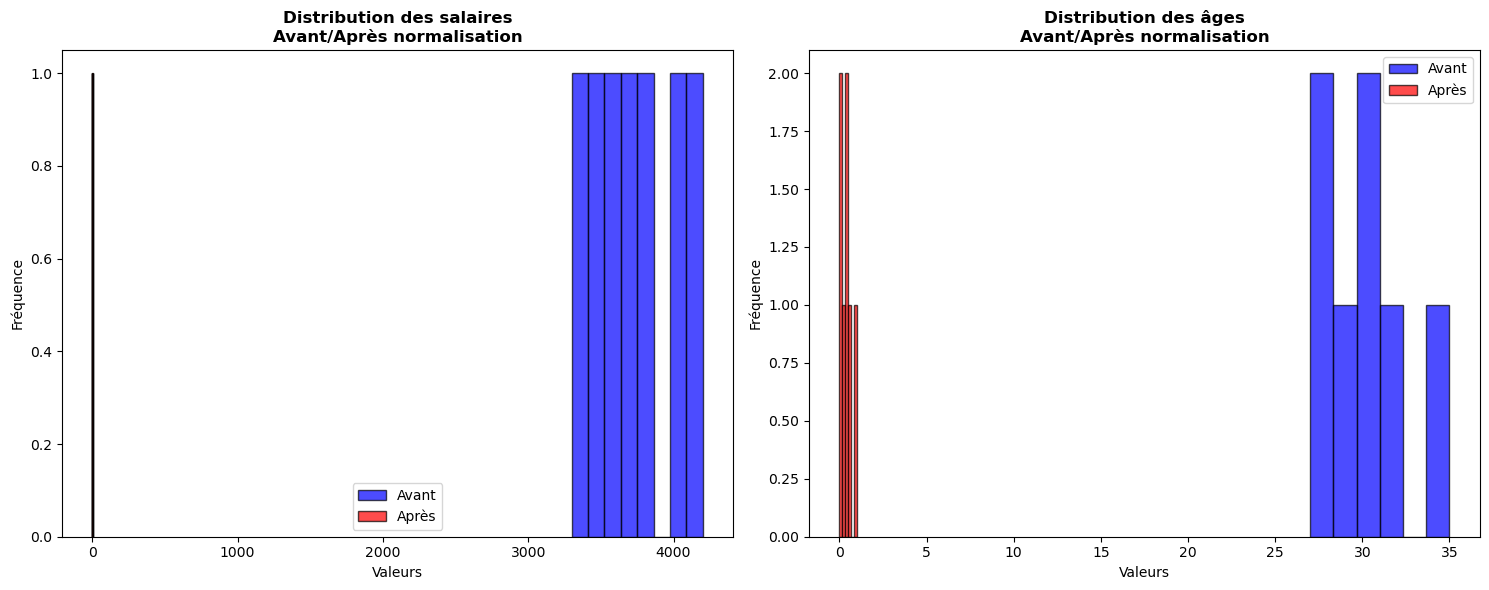

In [35]:
# Comparaison des distributions avant et après normalisation

df1, df2 = charger_bases()
df1_clean = nettoyer_textes(imputer(df1))
    
if 'salaire' in df1_clean.columns and 'age' in df1_clean.columns:
    plt.figure(figsize=(15, 6))
        
    # Salaire avant/après normalisation
    plt.subplot(1, 2, 1)
    plt.hist(df1_clean['salaire'].dropna(), bins=8, alpha=0.7, color='blue', 
            edgecolor='black', label='Avant')
        
    df_normalized = normaliser(df1_clean.copy())
    plt.hist(df_normalized['salaire'].dropna(), bins=8, alpha=0.7, color='red', 
            edgecolor='black', label='Après')
        
    plt.title("Distribution des salaires\nAvant/Après normalisation", fontweight='bold')
    plt.xlabel("Valeurs")
    plt.ylabel("Fréquence")
    plt.legend()
        
    # Âge avant/après normalisation
    plt.subplot(1, 2, 2)
    plt.hist(df1_clean['age'].dropna(), bins=6, alpha=0.7, color='blue', 
            edgecolor='black', label='Avant')
        
    plt.hist(df_normalized['age'].dropna(), bins=6, alpha=0.7, color='red', 
            edgecolor='black', label='Après')
        
    plt.title("Distribution des âges\nAvant/Après normalisation", fontweight='bold')
    plt.xlabel("Valeurs")
    plt.ylabel("Fréquence")
    plt.legend()
        
    plt.tight_layout()
    plt.show()

In [36]:
# Fusion
# Fusion des deux bases sur la colonne "nom"
def fusionner_bases():
    df1, df2 = charger_bases()
    df1 = nettoyer_textes(imputer(df1))
    df2 = nettoyer_textes(imputer(df2))
    if 'nom' in df1.columns and 'nom' in df2.columns:
        merged = pd.merge(df1, df2, on='nom', how='outer', suffixes=('_base1', '_base2'))
    else:
        merged = pd.concat([df1, df2], ignore_index=True)
    merged = normaliser(merged)
    return merged

In [37]:
# Structure de la base fusionnée finale
df_final = fusionner_bases()
print("=== STRUCTURE BASE FUSIONNÉE ===")
display(df_final.head())

# Statistiques descriptives
print("\nStatistiques descriptives:")
print(df_final.describe())

=== STRUCTURE BASE FUSIONNÉE ===


,id_base1,nom,age,salaire_base1,date_embauche,id_base2,poste,departement,salaire_base2
0,NaN,ALI,NaN,NaN,NaN,6.0,consultant,Finance,0.368421
1,1.0,Ahmed,0.375,0.222222,2020-01-10,1.0,ingénieur,Informatique,0.000000
2,NaN,Fatima,NaN,NaN,NaN,7.0,Data Scientist,IT,0.578947
3,3.0,KARIM,1.000,0.777778,2018-09-20,NaN,NaN,NaN,NaN
4,NaN,Lina,NaN,NaN,NaN,4.0,Manager,RH,1.000000



Statistiques descriptives:
       id_base1       age  salaire_base1  id_base2  salaire_base2
count  7.000000  7.000000       7.000000  7.000000       7.000000
mean   4.000000  0.395833       0.481481  4.000000       0.464912
std    2.160247  0.333984       0.337423  2.160247       0.333449
min    1.000000  0.000000       0.000000  1.000000       0.000000
25%    2.500000  0.187500       0.277778  2.500000       0.263158
50%    4.000000  0.375000       0.481481  4.000000       0.464912
75%    5.500000  0.510417       0.666667  5.500000       0.631579
max    7.000000  1.000000       1.000000  7.000000       1.000000


In [38]:
# Exporte le résultat dans un fichier CSV
def exporter_csv(df, nom_fichier="base_fusionnee.csv"):
    df.to_csv(nom_fichier, index=False, encoding="utf-8-sig")
    print(f"Fichier {nom_fichier} exporté avec succès!")

In [39]:
# Test direct du script
if __name__ == "__main__":
    # Fusionner les bases et exporter
    df_final = fusionner_bases()
    exporter_csv(df_final)

Fichier base_fusionnee.csv exporté avec succès!
